# Linear Regrssion Model - House price prediction

# 1. Contents

1. Goal - Data Acquisition and Exploration

2. Regression Analysis

3. Apply regression analysis techniques and EDA principles to make inferences about pricing for all records included in the data set

4. Inference on the models and model performance using relevant metrics 

##

In [1]:
import unittest
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.animation as animation

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# 2. Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
# !wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

df_train = pd.read_csv('house_prices_train.csv')

# 3. Data exploration

In [3]:
display(df_train.head())
df_train['SalePrice'].describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 3.1. Distribution Plot (column = 'Sales Price')

/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

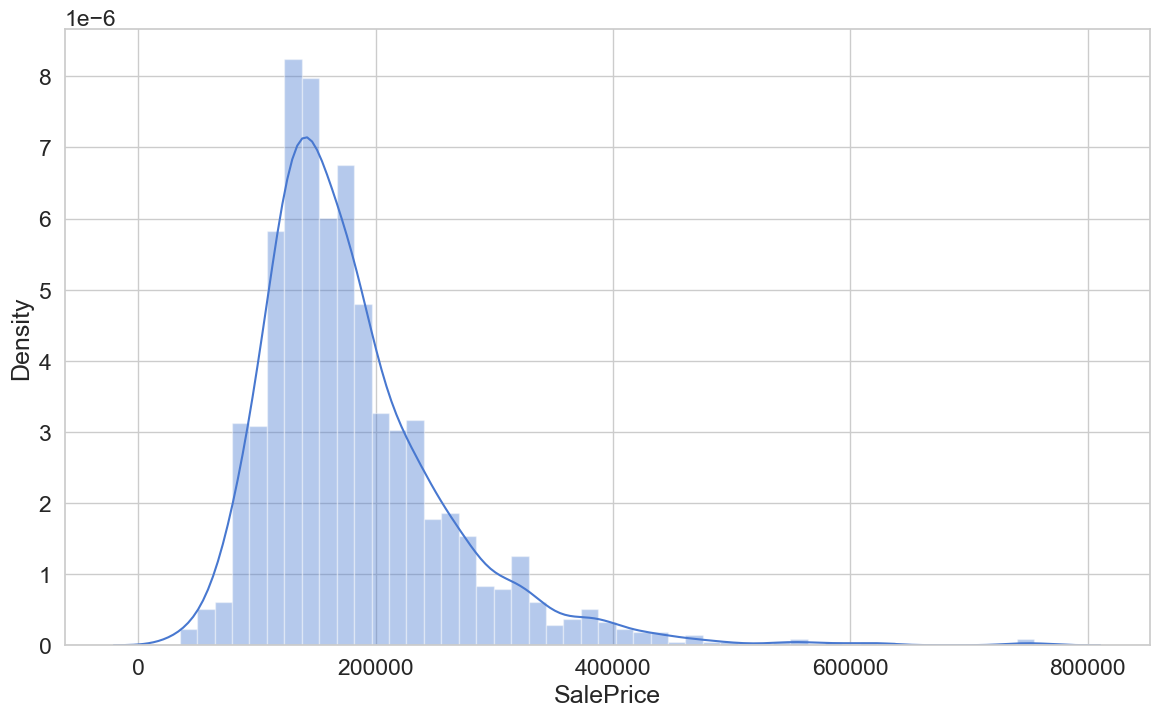

In [4]:
sns.distplot(df_train['SalePrice'])

# 3.2. Scatter Plot (column = 'GrLivArea vs Sales Price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


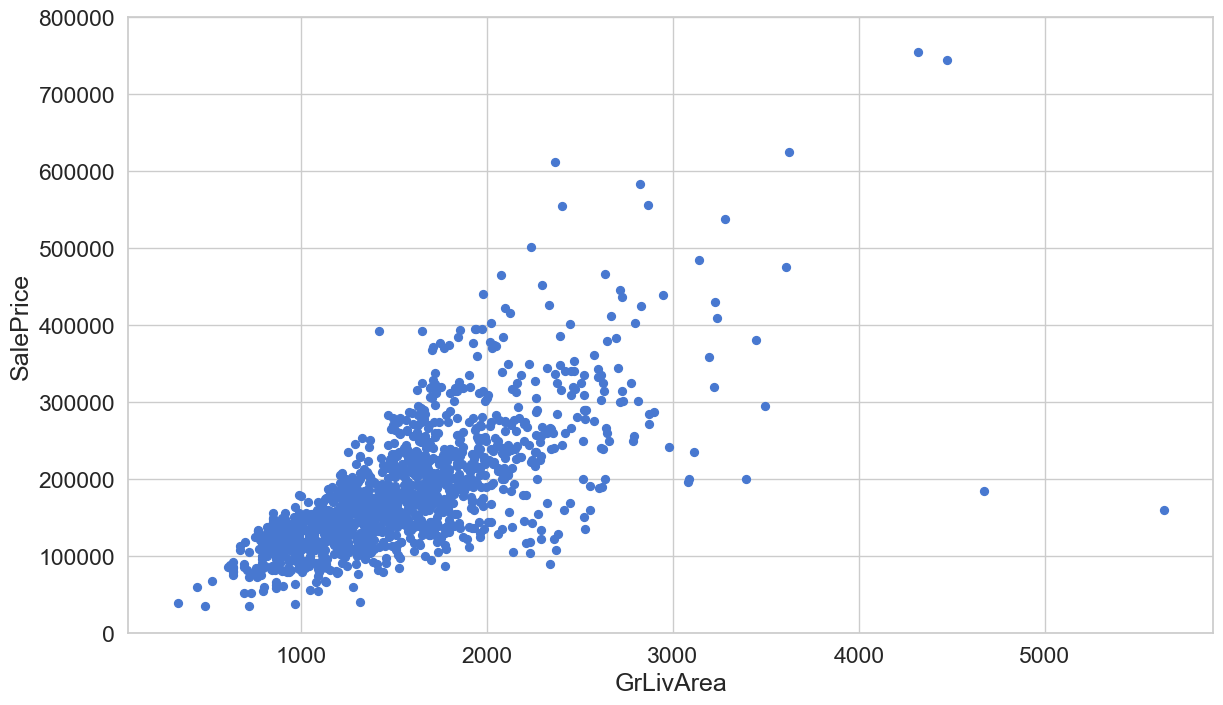

In [5]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

# 3.3. Scatter Plot (column = 'TotalBsmtSF vs Sales Price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


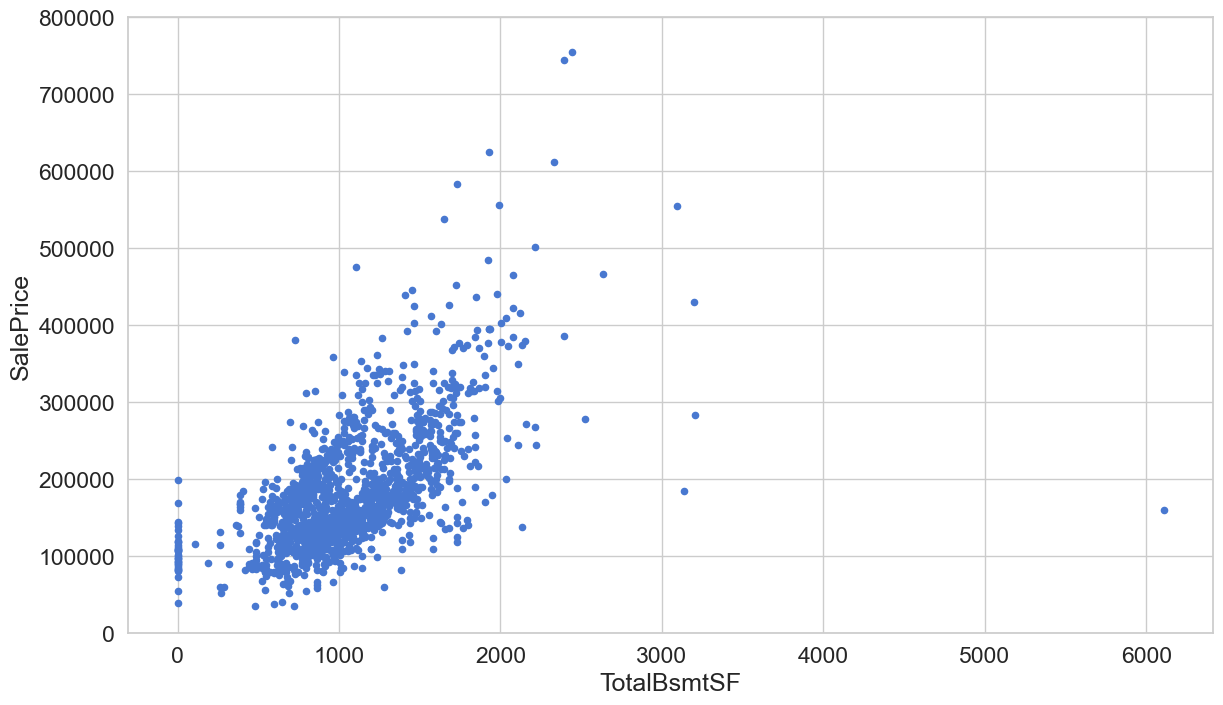

In [6]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 3.4. Box Plot (column = 'OverallQual vs Sales Price')

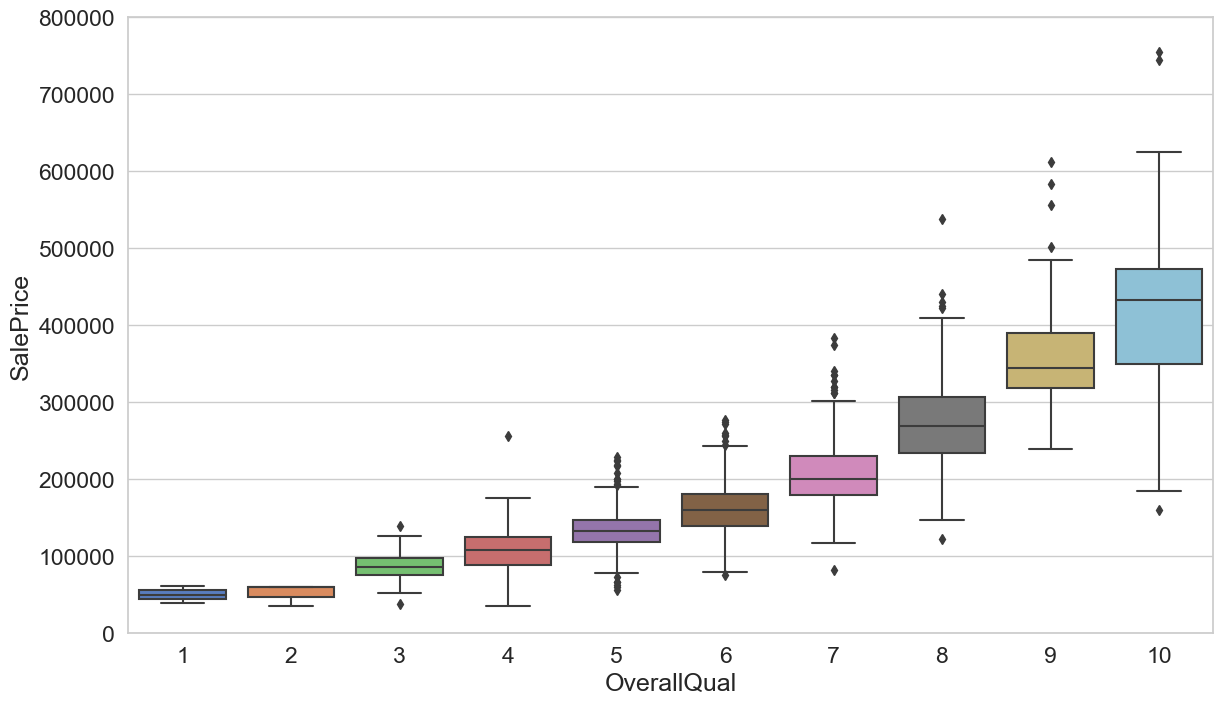

In [7]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# 3.5. Correlatin Map (Heat Map)

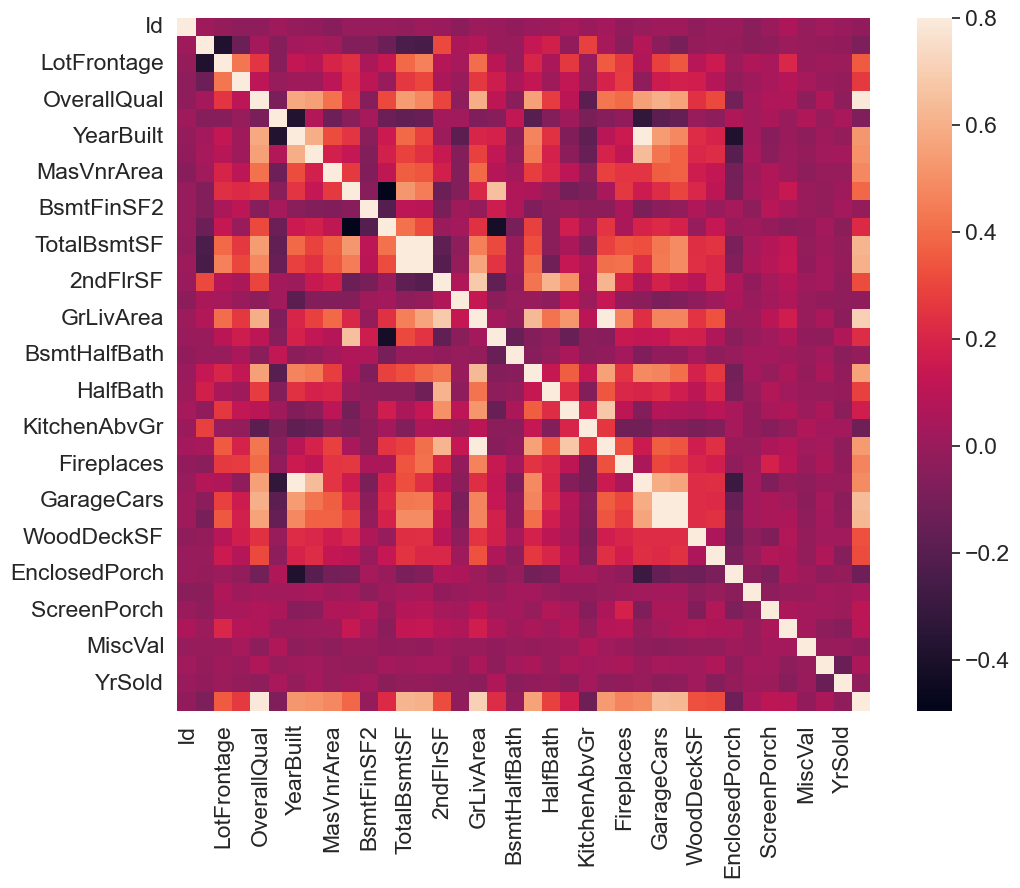

In [8]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# 3.6. Correlatin Map for top 9 Variables (Heat Map)

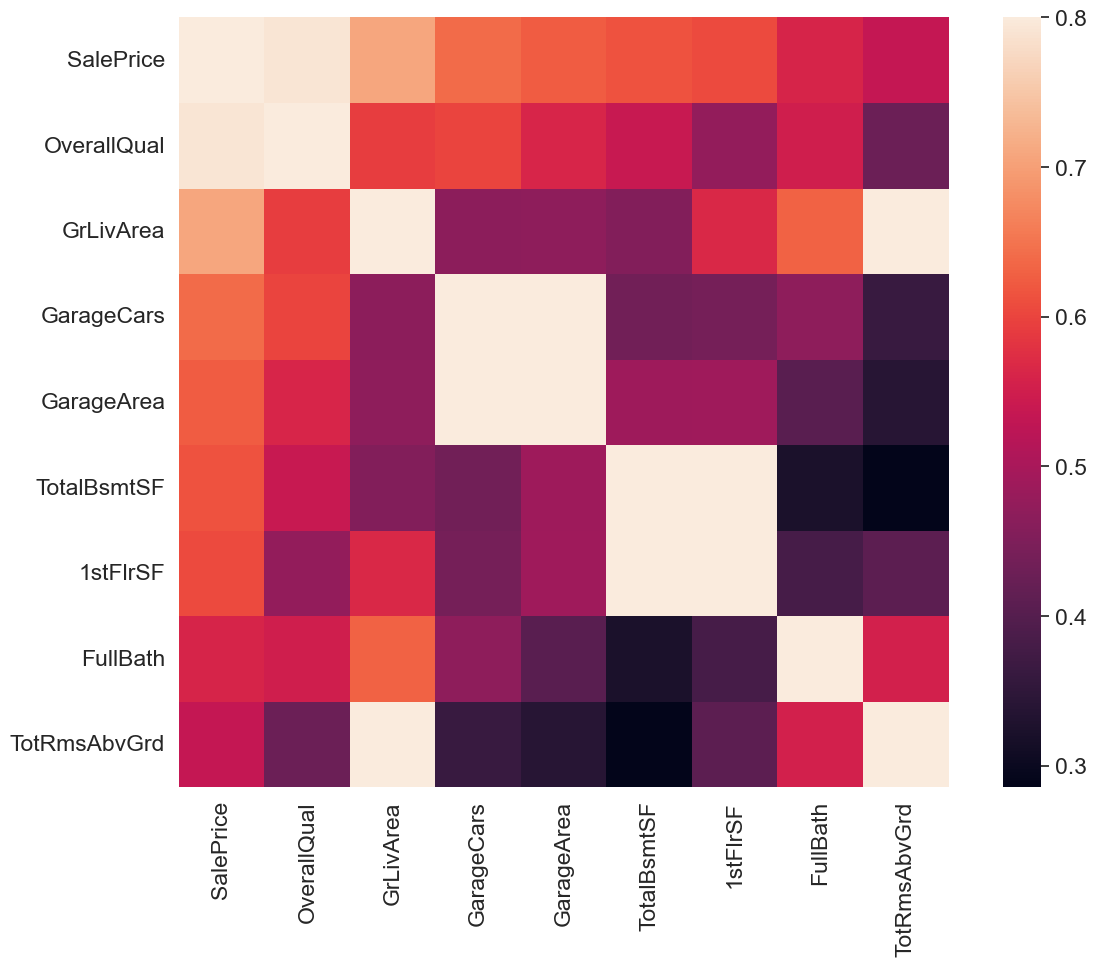

In [9]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

# 3.7. Pair Plot ('SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars')

/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


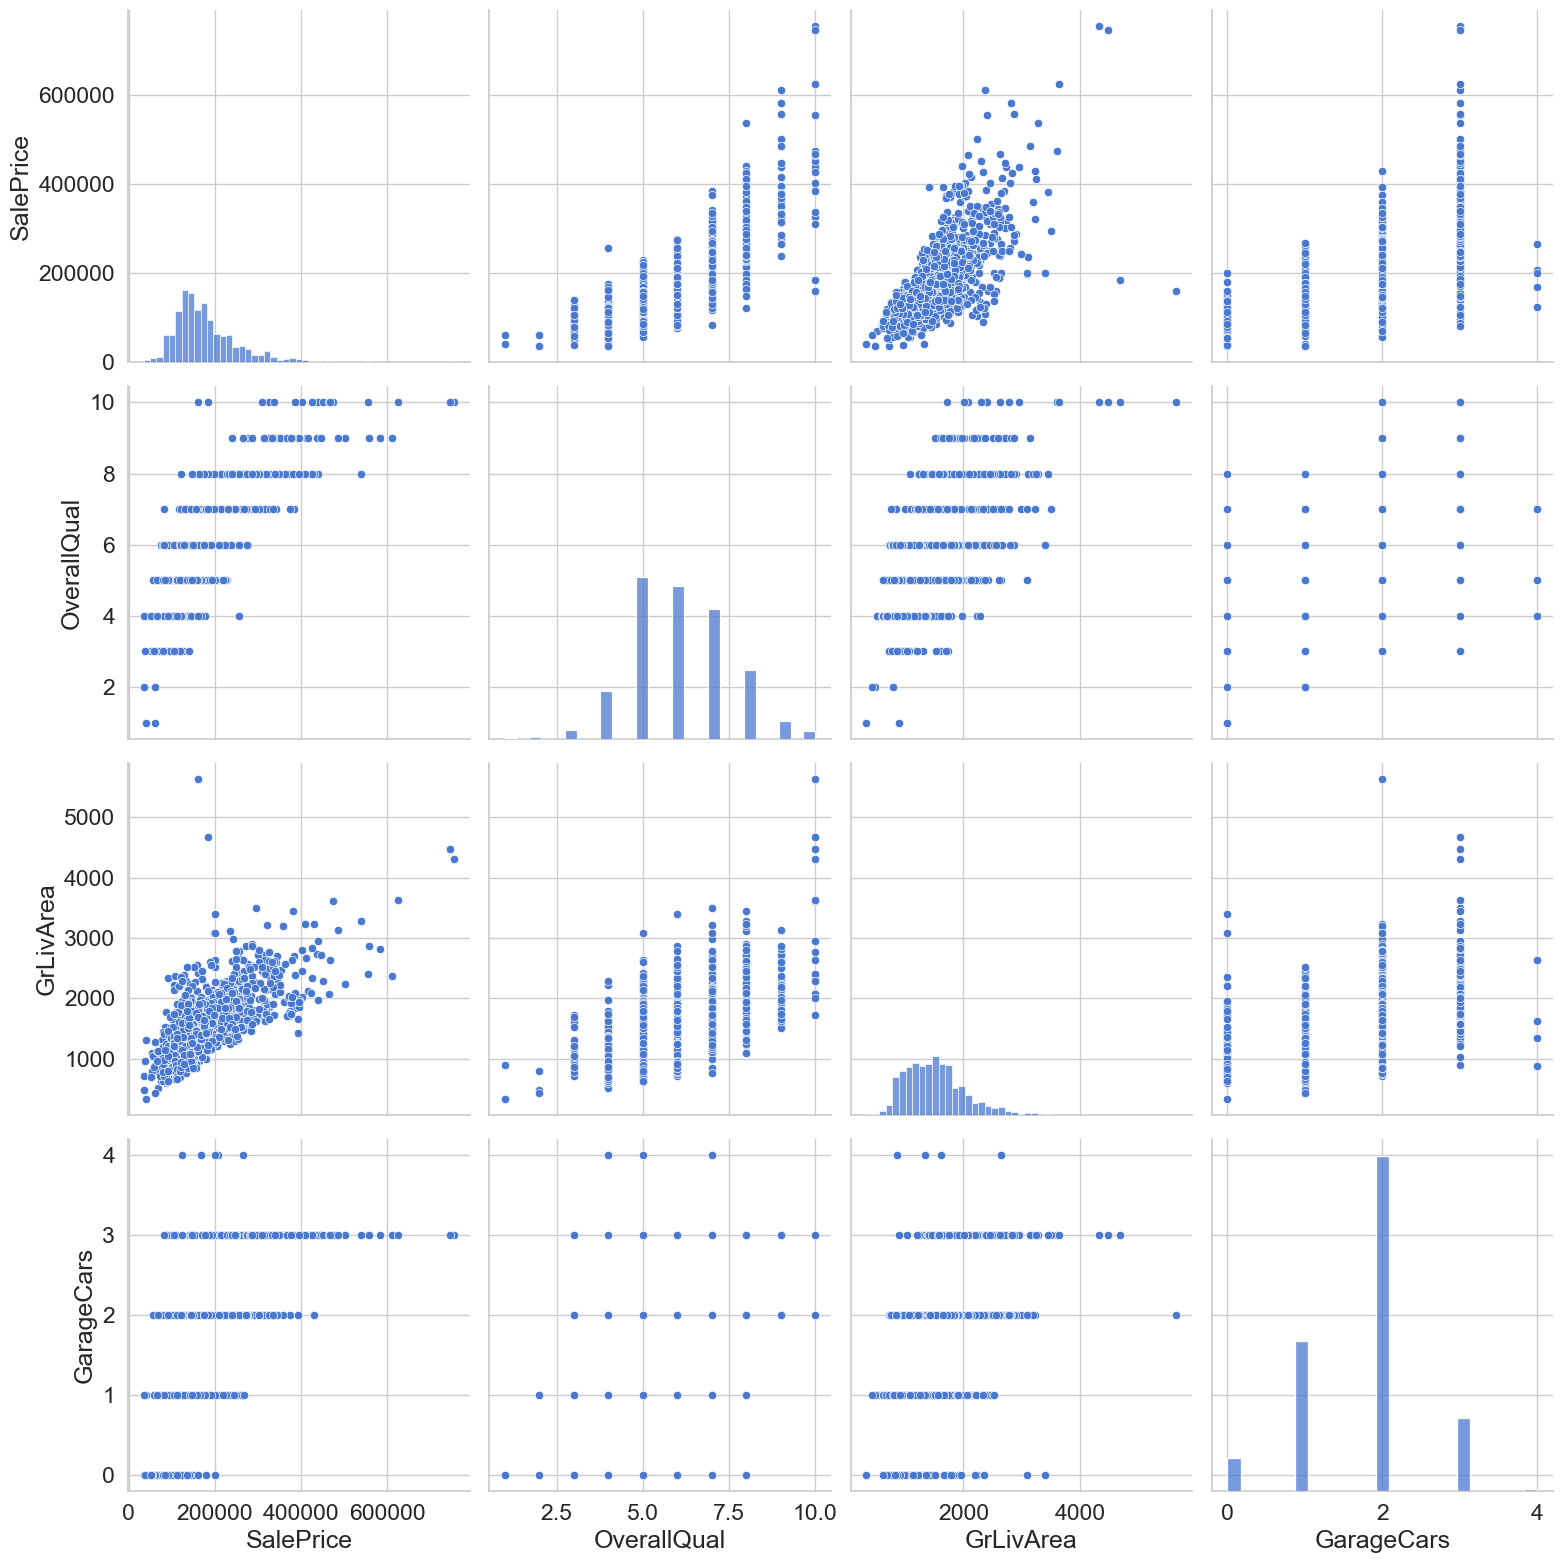

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);

## 3.8 Do we have missing data?

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# 4.1 Predicting the sale price

## Preparing the data

### Feature scaling

Preprocessing Steps : using the following formula (standardization):

$$x'= \frac{x - \mu}{\sigma}$$

where $\mu$ is the population mean and $\sigma$ is the standard deviation.

![](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/FeatureScaling.jpg)

**Source: Andrew Ng**

In [12]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [13]:
x.shape

(1460, 2)

## 4.2 Linear Regression

<!-- ![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg) -->

**Source: **

Linear regression models assume that the relationship between a dependent continuous variable $Y$ and one or more explanatory (independent) variables $X$ is linear (that is, a straight line). It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). Linear regression models can be divided into two main types:

### Simple Linear Regression

Simple linear regression uses a traditional slope-intercept form, where $a$ and $b$ are the coefficients that we try to “learn” and produce the most accurate predictions. $X$ represents our input data and $Y$ is our prediction.

$$Y = bX + a$$

<!-- ![](https://spss-tutorials.com/img/simple-linear-regression-equation-linear-relation.png) -->

**Source: SPSS tutorials**

### Multivariable Regression

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0$$

The variables $x_1, x_2, x_3$ represent the attributes, or distinct pieces of information, we have about each observation.

In [14]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

## 4.3 Loss function

Given our Simple Linear Regression equation:

$$Y = bX + a$$

We can use the following cost function to find the coefficients:

### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2$$

where

$$h_w(x) = g(w^Tx)$$

The MSE measures how much the average model predictions vary from the correct values. The number is higher when the model is performing "bad" on the training set.

The first derivative of MSE is given by:

$$MSE' = J'(W) = \frac{2}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$


### One Half Mean Squared Error (OHMSE)

We will apply a small modification to the MSE - multiply by $\frac{1}{2}$ so when we take the derivative, the `2`s cancel out:

$$ OHMSE = J(W) =  \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2 $$

The first derivative of OHMSE is given by:

$$OHMSE' = J'(W) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$

In [15]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

# 4.4 Fitting the Linear Regression Model 
(x = 'GrLivArea', y = 'SalePrice')

In [16]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [17]:
clf._W

array([180921.19555322,  56294.90199925])

# 4.5 Cost Function Graph (Simple Linear Regression)
('Cost vs No. of Iteration')

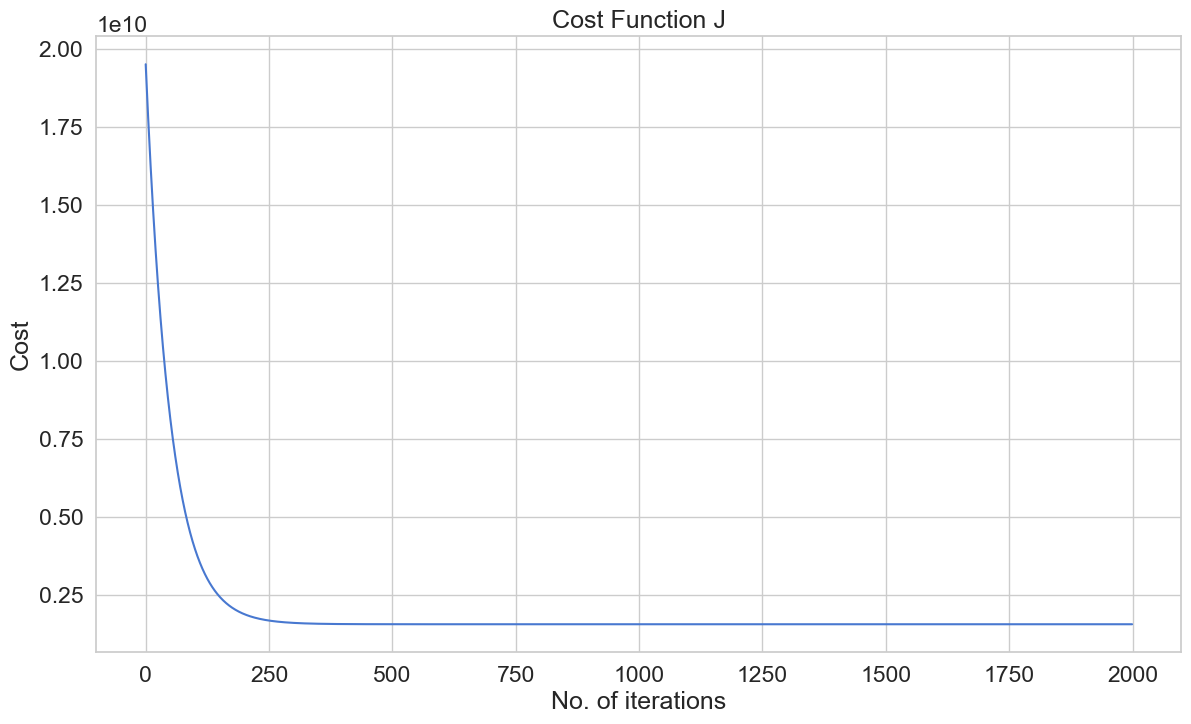

In [18]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [19]:
clf._cost_history[-1]

1569921604.8332634

# 4.6 Real time visualizing of the loss function (Animation)

In [20]:
# #Animation

# #Set the plot up,
# fig = plt.figure()
# ax = plt.axes()
# plt.title('Sale Price vs Living Area')
# plt.xlabel('Living Area in square feet (normalised)')
# plt.ylabel('Sale Price ($)')
# plt.scatter(x[:,1], y)
# line, = ax.plot([], [], lw=2, color='red')
# annotation = ax.text(-1, 700000, '')
# annotation.set_animated(True)
# plt.close()

# #Generate the animation data,
# def init():
#     line.set_data([], [])
#     annotation.set_text('')
#     return line, annotation

# # animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(-5, 20, 1000)
#     y = clf._w_history[i][1]*x + clf._w_history[i][0]
#     line.set_data(x, y)
#     annotation.set_text('Cost = %.2f e10' % (clf._cost_history[i]/10000000000))
#     return line, annotation

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=300, interval=10, blit=True)

# rc('animation', html='jshtml')

# anim

# 4.7 Multivariable Linear Regression

Multivariable Linear Regression model and see whether or not that will improve our OHMSE error:

(x = ['OverallQual', 'GrLivArea', 'GarageCars'], y = 'SalePrice')

In [21]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf_mv = LinearRegression()
clf_mv.fit(x, y, n_iter=2000, lr=0.01)

In [22]:
clf_mv._W

array([180921.19555322,  37478.604254  ,  26631.93830568,  15921.22581327])

# 4.8 Cost Function Graph (Multivariable Regression)
('Cost vs No. of Iteration')

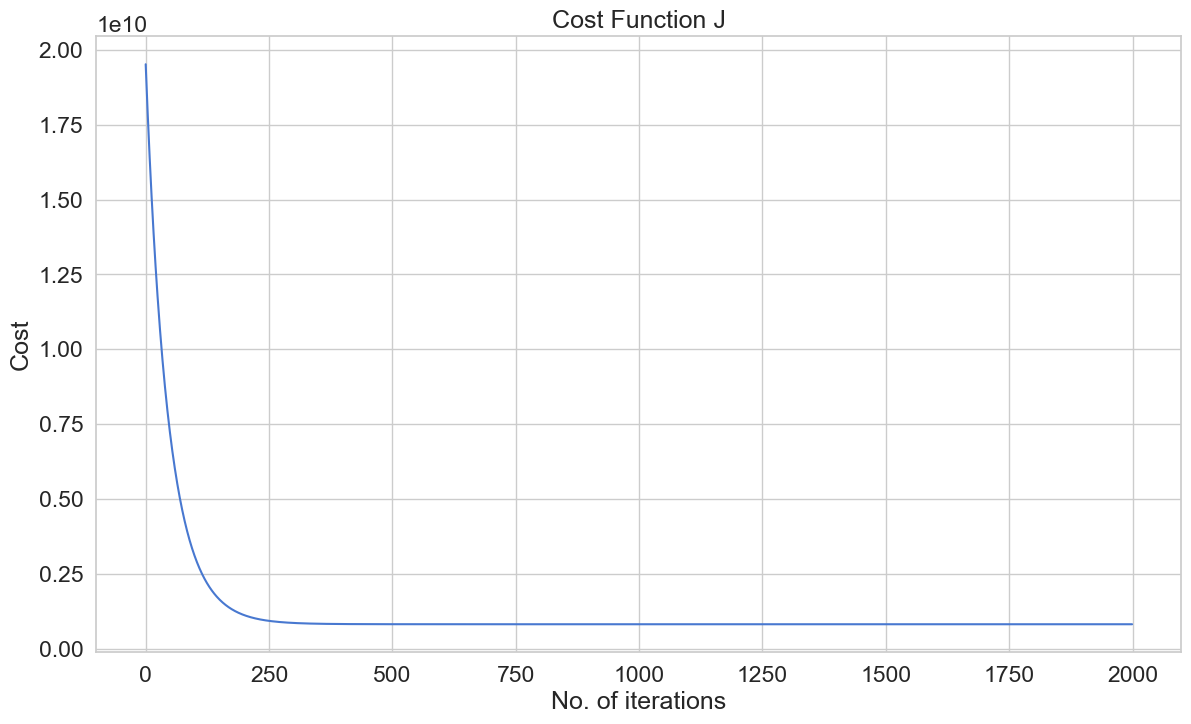

In [23]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf_mv._cost_history)
plt.show()

In [24]:
clf_mv._cost_history[-1]

822817042.8437101

# 5. Results

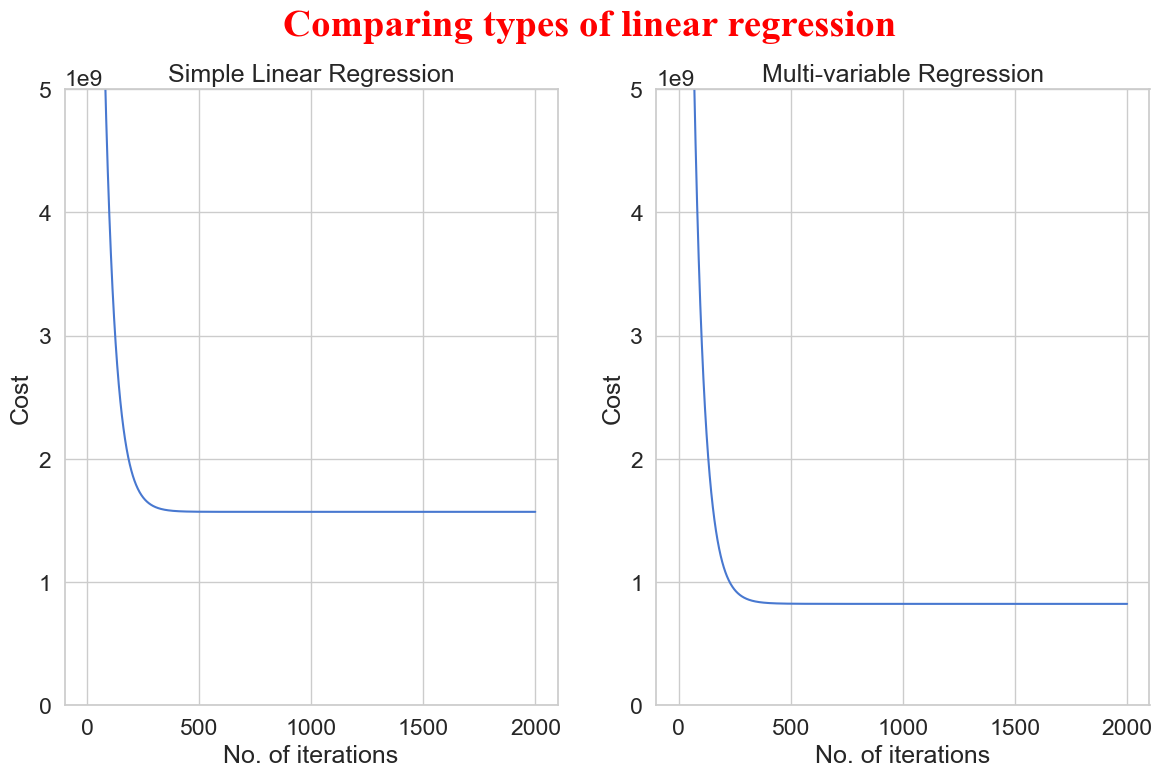

In [25]:
# Subplot for linear Regression
fig, ax = plt.subplots(1,2)
fig.suptitle("Comparing types of linear regression", fontname="Times New Roman", size=28, fontweight="bold", color='red')

plt.subplot(1, 2, 1)
plt.title('Simple Linear Regression')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.ylim(0, 0.50 * 1e10)
plt.plot(clf._cost_history)

plt.subplot(1, 2, 2)
plt.title('Multi-variable Regression')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.ylim(0, 0.50 * 1e10)
plt.plot(clf_mv._cost_history)
plt.show()

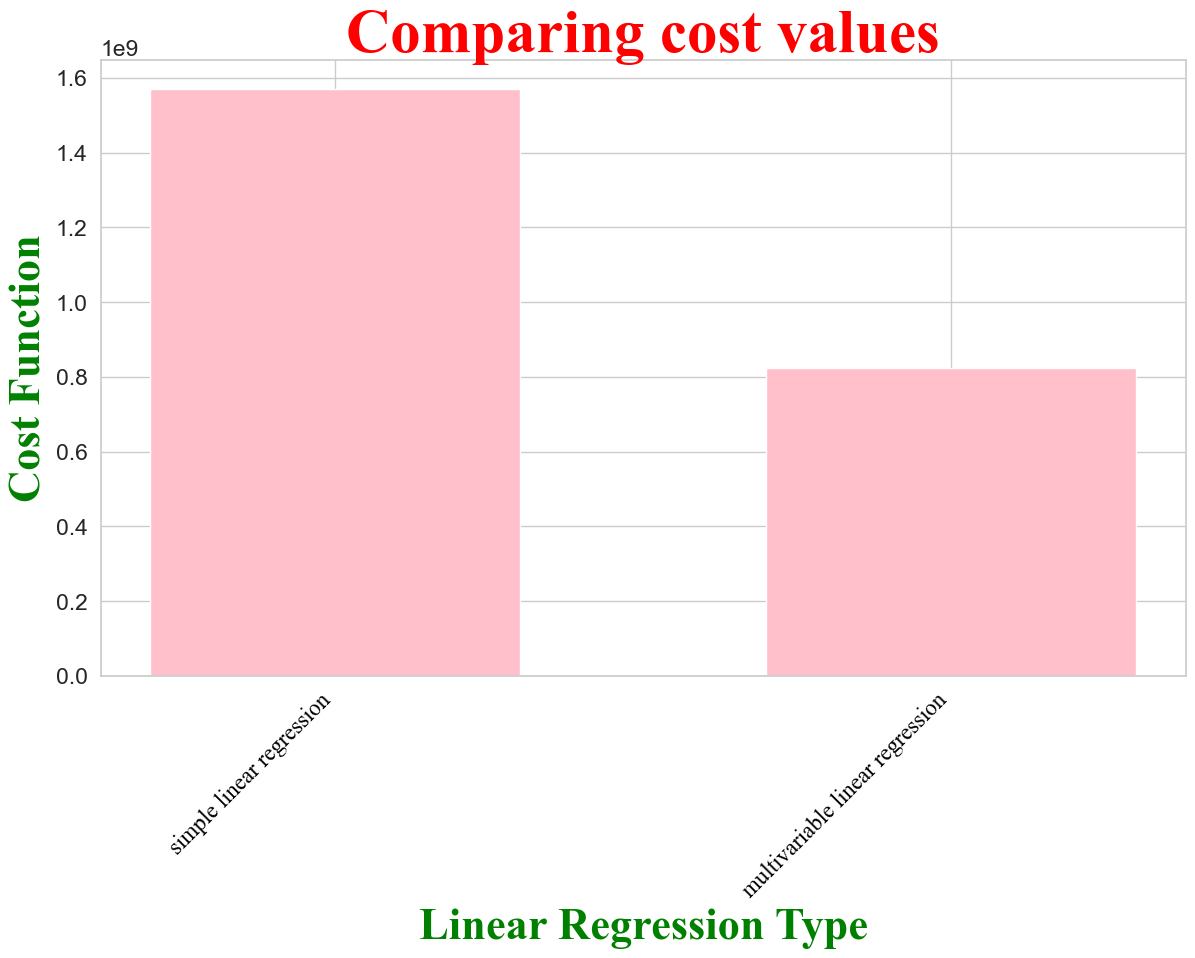

In [26]:
clf_ls_his = clf._cost_history[-1]
clf_mv_his = clf_mv._cost_history[-1]
x_bar = ['simple linear regression', 'multivariable linear regression']
y_bar = [clf_ls_his, clf_mv_his]

plt.bar(x_bar, y_bar, width=0.6, color='pink')
plt.xlabel("Linear Regression Type", fontname="Times New Roman", size=32, fontweight="bold", color='green')
plt.ylabel("Cost Function", fontname="Times New Roman", size=32, fontweight="bold", color='green')
plt.title("Comparing cost values", fontname="Times New Roman", size=44, fontweight="bold", color='red')
plt.xticks(rotation=45, ha='right', color='000000', fontname="Times New Roman")
plt.show()

# 6. Discussion and Conclusion

1. Based on the cost function we can interpret that the multivarible linear regression is performing better than Simple linear Regression

2. Also, in real life we know that adding more variables can give us better estimation of the housing prices.

3. In this example, 'Above grade (ground) living area square feet' (GRlivArea - variable) is not that informative, which we can see in the simple linear regression analysis as the cost function is found to be high for predicting sales price.

4. Whereas, the variables, 'Overall material and finish quality, Above grade (ground) living area square feet and Size of garage in car capacity' can give us better prediction for sales price.